
# result

Accuracy: 93.29%

 Training Accuracy score: 0.9982758620689656
Testing Accuracy score: 0.9328743545611016
classification_report 
               precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       239
         1.0       0.95      0.94      0.94       342

    accuracy                           0.93       581
   macro avg       0.93      0.93      0.93       581
weighted avg       0.93      0.93      0.93       581



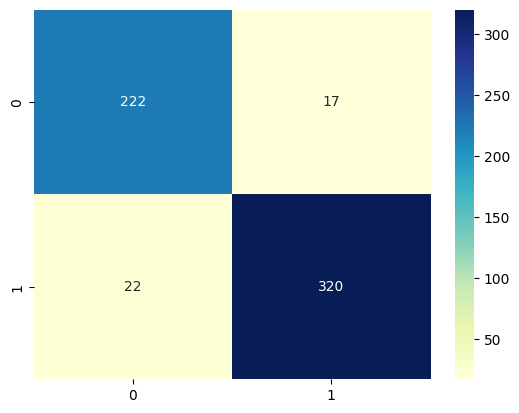

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('../Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)


clf=RandomForestClassifier()
clf.fit(x_train,y_train)
score = clf.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   

Accuracy: 88.12%

 Training Accuracy score: 0.9982758620689656
Testing Accuracy score: 0.8812392426850258
classification_report 
               precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       239
         1.0       0.89      0.91      0.90       342

    accuracy                           0.88       581
   macro avg       0.88      0.88      0.88       581
weighted avg       0.88      0.88      0.88       581



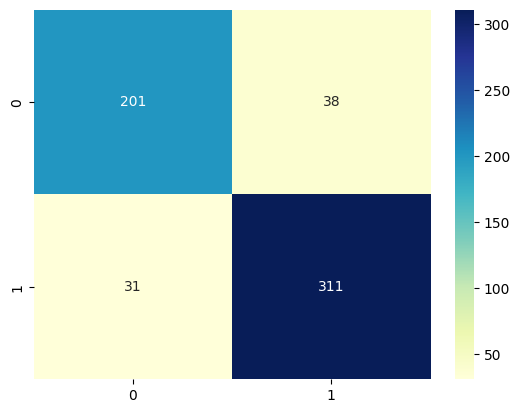

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('../Data/cleandata.csv')

x=data.iloc[:, :-1]
y = data.IsABot.values.tolist()
tl = TomekLinks()
x, y = tl.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
pipeline = Pipeline([
    ('scaler', StandardScaler()), # Standardizing the data
    ('pca', PCA()), # Transforming the data with PCA
    ('rf', RandomForestClassifier()) # Training a random forest classifier on the data
])

# Train the pipeline on the data
pipeline.fit(x_train, y_train)

score = pipeline.score(x_test, y_test)
print("Accuracy: %.2f%%" % (score * 100))
y_pred_train = pipeline.predict(x_train)
y_pred_test = pipeline.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()